In [1]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, ScalarFormatter
from matplotlib.patches import Rectangle
from matplotlib.gridspec import GridSpec

In [2]:
def month_change(date):
    dict_m = {'янв': 'Jan','фев': 'Feb','март': 'Mar','апр': 'Apr','май': 'May','июнь': 'Jun','июль': 'Jul','авг': 'Aug', 'сен': 'Sep', 'окт': 'Oct', 'ноя': 'Nov', 'дек': 'Dec'}
    for month in date.split(' '):
        for j in dict_m.keys():
            if month == j:
                month = dict_m[j]
                res = ' '.join([date.split(' ')[0], month, date.split(' ')[2]])
            else:
                month = month
    return res

In [3]:
def month_dig_change(date):
    dict_m = {'1': '01','2': '02','3': '03','4': '04','5': '05','6': '06','7': '07','8': '08', '9': '09', '10': '10', '11': '11', '12': '12'}
    res = []
    for month in date.split('.')[0]:
        for j in dict_m.keys():
            if month == j:
                res = '.'.join([dict_m[j], date.split('.')[1]])
    return res

In [4]:
def year_dig_change(date):
    dict_m = {'202': '2020', '201': '2010'}
    res = []
    for year in date.split('.'):
        for j in dict_m.keys():

            if year == j:
                res = '.'.join([date.split('.')[0], dict_m[j]])
                break
            else:
                res = '.'.join([date.split('.')[0], date.split('.')[1]])

    return res

## Data Upload

In [5]:
%%time
chem_init = pd.read_csv('him_anliz_09012023092404.csv', encoding = 'cp1251', sep = ';')
bott_init = pd.read_csv('wellhd09012023111844.csv', encoding = 'cp1251', sep = ';')
pads_init = pd.read_csv('sug_pads.csv', encoding = 'cp1251', sep = ';')

Wall time: 61 ms


In [6]:
chem_init.head()

,Номер скважины,Дата проведения хим. анализа,Пласт,Место отбора,Содержание PH,Содержание CL(мг/л),Содержание HCO3(мг/л),Содержание CO3(мг/л),Содержание CA(мг/л),Содержание MG(мг/л),...,Содержание CL(мг-экв/л),Содержание HCO3(мг-экв/л),Содержание CO3(мг-экв/л),Содержание CA(мг-экв/л),Содержание MG(мг-экв/л),Содержание NAK(мг-экв/л),Общая минерализация(мг/л),Плотность воды(г/см3),Общая минерализация(мг-экв/л),Процентное содержание воды
0,611_1007,10-05-2003,БС9/2,Устье скважины,6.0,832.37,30.5,0.00,50.10,30.38,...,23.48,0.5,0.0,2.5,2.5,18.98,1379.89,1.000,47.96,99.8
1,611_1007,22-05-2003,БС9/2,Устье скважины,6.0,6850.36,1433.5,0.00,100.20,24.30,...,193.24,23.5,0.0,5.0,2.0,209.74,13232.38,1.007,433.48,99.9
2,611_1007,23-05-2003,БС9/2,Устье скважины,6.0,8391.72,1250.5,0.00,110.22,85.05,...,236.72,20.5,0.0,5.5,7.0,244.72,15466.05,1.010,514.44,99.9
3,611_1007,24-05-2003,БС9/2,Устье скважины,6.0,8905.39,793.0,15.25,130.26,54.68,...,251.21,13.0,0.5,6.5,4.5,253.71,15733.91,1.010,529.42,99.9
4,611_1010,27-04-2003,БС9/2,Устье скважины,6.0,7159.84,1159.0,15.25,100.20,18.23,...,201.97,19.0,0.5,5.0,1.5,214.97,13396.83,1.007,442.94,92.9


In [7]:
%%time
chem_init.rename(columns = 
            {'Номер скважины':'well',
            'Дата проведения хим. анализа':'date',
            'Пласт':'zone',
            'Место отбора':'source',
            'Общая минерализация(мг/л)':'mineral',
            'Процентное содержание воды':'watercut',
            }, inplace=True)
chem = chem_init[['well', 'date', 'zone', 'source', 'mineral', 'watercut']]
chem['well'] = chem['well'].astype("string")
chem['zone'] = chem['zone'].astype("string")
chem['source'] = chem['source'].astype("string")
chem['mineral'] = chem['mineral'].astype("float")
chem['watercut'] = chem['watercut'].astype("float")
# data1['date'] = data1['date'].apply(lambda x: month_change(x))
chem['date'] = pd.to_datetime(chem['date'], dayfirst=True)

Wall time: 19 ms


In [8]:
chem.head()

,well,date,zone,source,mineral,watercut
0,611_1007,2003-05-10,БС9/2,Устье скважины,1379.89,99.8
1,611_1007,2003-05-22,БС9/2,Устье скважины,13232.38,99.9
2,611_1007,2003-05-23,БС9/2,Устье скважины,15466.05,99.9
3,611_1007,2003-05-24,БС9/2,Устье скважины,15733.91,99.9
4,611_1010,2003-04-27,БС9/2,Устье скважины,13396.83,92.9


In [9]:
bott_init.rename(columns = 
            {'UWI':'well',
            'Х_ЗАБОЙ':'x_coord',
            'Y_ЗАБОЙ':'y_coord',
            'ИМЯ_NGT':'ngt_name'}, inplace=True)
bott = bott_init[['well', 'x_coord', 'y_coord', 'ngt_name']]
bott['well'] = bott['well'].astype("string")
bott['x_coord'] = bott['x_coord'].astype("float")
bott['y_coord'] = bott['y_coord'].astype("float")
bott['ngt_name'] = bott['ngt_name'].astype("string")

In [10]:
bott.head()

,well,x_coord,y_coord,ngt_name
0,611_1006G,440735.8860,7104618.907,1006
1,611_1006PL,440774.7160,7104121.387,1006PL
2,611_1007,441335.5605,7104675.643,1007
3,611_1010,441695.9150,7103502.098,1010
4,611_1031G,440882.5395,7103658.584,1031


In [11]:
bott.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224 entries, 0 to 1223
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   well      1224 non-null   string 
 1   x_coord   1201 non-null   float64
 2   y_coord   1201 non-null   float64
 3   ngt_name  1224 non-null   string 
dtypes: float64(2), string(2)
memory usage: 38.4 KB


In [12]:
pads_init.rename(columns = 
            {'Имя куста':'pad',
             'Координата X':'pad_x',
             'Координата Y':'pad_y'}, inplace=True)
pads = pads_init[['pad', 'pad_x', 'pad_y']]
pads['pad'] = pads['pad'].astype("string")
pads['pad_x'] = pads['pad_x'].astype("float")
pads['pad_y'] = pads['pad_y'].astype("float")
pads.head()

,pad,pad_x,pad_y
0,КУСТ-1,440157.69,7103490.82
1,КУСТ-100,432763.88,7079038.46
2,КУСТ-106,430261.21,7070437.72
3,КУСТ-107,426633.51,7068118.77
4,КУСТ-108,426702.34,7066133.99


## Data Processing

In [13]:
chem_wells = chem.set_index('well').join(bott.set_index('well'))
chem_wells

,date,zone,source,mineral,watercut,x_coord,y_coord,ngt_name
well,,,,,,,,
611_1007,2003-05-10,БС9/2,Устье скважины,1379.89,99.80,441335.5605,7104675.643,1007
611_1007,2003-05-22,БС9/2,Устье скважины,13232.38,99.90,441335.5605,7104675.643,1007
611_1007,2003-05-23,БС9/2,Устье скважины,15466.05,99.90,441335.5605,7104675.643,1007
611_1007,2003-05-24,БС9/2,Устье скважины,15733.91,99.90,441335.5605,7104675.643,1007
611_1010,2003-04-27,БС9/2,Устье скважины,13396.83,92.90,441695.9150,7103502.098,1010
...,...,...,...,...,...,...,...,...
611_6WZ,2012-12-04,Неизвестен,<NA>,20540.00,NaN,430727.0077,7064459.148,6ВЗ
611_6WZ,2019-11-05,Неизвестен,<NA>,33820.00,98.89,430727.0077,7064459.148,6ВЗ
611_8WZ,2017-05-02,Неизвестен,<NA>,21310.00,99.90,430404.7654,7064874.900,8ВЗ


In [44]:
chem_avg.query('well =="611_2090"')

,min_min,wc_min,min_avg,wc_avg,min_max,wc_max,x_coord,y_coord
well,,,,,,,,
611_2090,13840.0,32.76,18175.652174,56.149333,19990.0,75.27,432224.6577,7068433.69


In [43]:
chem_wells.query('well =="611_2090"')

,date,zone,source,mineral,watercut,x_coord,y_coord,ngt_name
well,,,,,,,,
611_2090,2014-02-27,Неизвестен,<NA>,18520.0,NaN,432224.6577,7068433.69,2090
611_2090,2014-05-08,Неизвестен,<NA>,19170.0,NaN,432224.6577,7068433.69,2090
611_2090,2014-08-07,Неизвестен,<NA>,18680.0,NaN,432224.6577,7068433.69,2090
611_2090,2014-11-06,Неизвестен,<NA>,19630.0,NaN,432224.6577,7068433.69,2090
611_2090,2015-02-10,Неизвестен,<NA>,17320.0,NaN,432224.6577,7068433.69,2090
611_2090,2015-02-14,Неизвестен,<NA>,17360.0,NaN,432224.6577,7068433.69,2090
611_2090,2015-05-07,Неизвестен,<NA>,18150.0,NaN,432224.6577,7068433.69,2090
611_2090,2015-08-06,Неизвестен,<NA>,17550.0,40.57,432224.6577,7068433.69,2090
611_2090,2015-11-05,Неизвестен,<NA>,18510.0,46.60,432224.6577,7068433.69,2090


In [14]:
chem_wells.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14921 entries, 611_1007 to 611_9WZ
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      14921 non-null  datetime64[ns]
 1   zone      14921 non-null  string        
 2   source    3616 non-null   string        
 3   mineral   14884 non-null  float64       
 4   watercut  9219 non-null   float64       
 5   x_coord   14866 non-null  float64       
 6   y_coord   14866 non-null  float64       
 7   ngt_name  14921 non-null  string        
dtypes: datetime64[ns](1), float64(4), string(3)
memory usage: 1.0+ MB


In [15]:
chem_wells.zone.unique()

<StringArray>
['БС9/2', 'Неизвестен', '0Б9', '1ПК20', 'БВ5', 'БС9']
Length: 6, dtype: string

In [16]:
# chem_wells = chem_wells.query('zone == "БС9" or zone == "БС9/2"')
# chem_wells

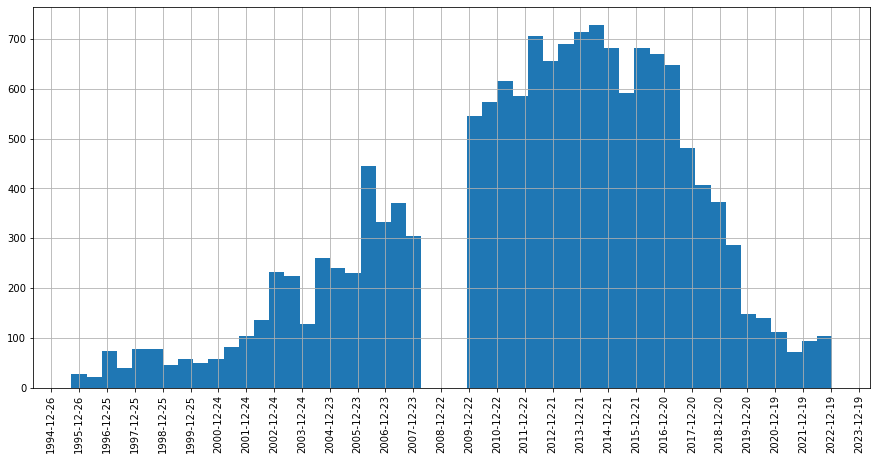

In [17]:
f, ax = plt.subplots(figsize = (15,7))
plt.hist(chem_wells.date, bins=50)
ax.xaxis.set_major_locator(MultipleLocator(365))
plt.xticks(rotation = 90)
plt.grid()

In [18]:
chem_avg = chem_wells.groupby(['well'])[['mineral', 'watercut', 'x_coord', 'y_coord']].mean()
chem_avg.rename(columns={'mineral':'min_avg','watercut':'wc_avg' }, inplace=True)
chem_min = chem_wells.groupby(['well'])[['mineral', 'watercut', 'x_coord', 'y_coord']].min()
chem_min.rename(columns={'mineral':'min_min','watercut':'wc_min' }, inplace=True)
chem_min = chem_min.drop(['x_coord', 'y_coord'], axis = 1)
chem_max = chem_wells.groupby(['well'])[['mineral', 'watercut', 'x_coord', 'y_coord']].max()
chem_max.rename(columns={'mineral':'min_max','watercut':'wc_max' }, inplace=True)
chem_max = chem_max.drop(['x_coord', 'y_coord'], axis = 1)

In [19]:
chem_avg = chem_avg.join(chem_max)
chem_avg = chem_avg.join(chem_min)

In [20]:
chem_avg = chem_avg[['min_min', 'wc_min','min_avg', 'wc_avg', 'min_max', 'wc_max', 'x_coord', 'y_coord',]]

In [21]:
chem_avg.sort_values(by = 'min_avg', ascending=False)

,min_min,wc_min,min_avg,wc_avg,min_max,wc_max,x_coord,y_coord
well,,,,,,,,
611_1824G,15970.32,-1.00,236696.904286,62.766667,1542500.63,95.00,431721.3923,7078693.759
611_2867,16050.00,25.30,63151.481481,81.970000,1228250.00,98.77,424425.8195,7050604.664
611_404R,13607.46,99.80,46923.531111,99.888889,147020.62,99.90,428883.4600,7082290.970
611_3218,28850.00,NaN,28850.000000,NaN,28850.00,NaN,423653.9500,7036063.280
611_2739,23270.00,NaN,27670.000000,NaN,32070.00,NaN,424124.6800,7055329.090
...,...,...,...,...,...,...,...,...
611_1058G2,9260.00,68.76,11705.000000,81.590000,14150.00,94.42,441776.9267,7102499.185
611_1007,1379.89,99.80,11453.057500,99.875000,15733.91,99.90,441335.5605,7104675.643
611_414R,4705.93,75.50,9647.105000,85.350000,14588.28,95.20,433438.1400,7096360.150


In [22]:
chem_wells.sort_values(by = 'date', ascending=False)

,date,zone,source,mineral,watercut,x_coord,y_coord,ngt_name
well,,,,,,,,
611_1268ST2,2023-01-05,Неизвестен,<NA>,14840.00,76.99,435891.8541,7093826.888,1268
611_1249G,2023-01-03,Неизвестен,<NA>,11420.00,97.97,434553.4793,7095029.509,1249
611_1500G,2023-01-03,Неизвестен,<NA>,14030.00,96.77,431000.4393,7088906.592,1500_1
611_1298G,2023-01-03,Неизвестен,<NA>,14910.00,98.17,432882.9783,7095578.097,1298Г
611_1058G2,2023-01-03,Неизвестен,<NA>,14150.00,94.42,441776.9267,7102499.185,1058
...,...,...,...,...,...,...,...,...
611_1746,1995-09-23,БС9/2,Устье скважины,0.00,99.90,430553.3855,7081848.412,1746
611_1745,1995-09-23,БС9/2,Устье скважины,17523.29,99.90,430270.6525,7082210.241,1745
611_1783,1995-09-22,БС9/2,Устье скважины,20426.97,99.90,429610.6821,7081540.075,1783


In [23]:
chem_avg_clean = chem_avg.query('12000 < min_avg < 22500')
chem_avg_clean.sort_values(by = 'min_avg', ascending=False)

,min_min,wc_min,min_avg,wc_avg,min_max,wc_max,x_coord,y_coord
well,,,,,,,,
611_2044,22240.00,NaN,22240.000000,NaN,22240.00,NaN,433364.8197,7068508.195
611_2295G,13510.00,56.7,21998.571429,82.990435,182530.00,96.2,426922.6040,7066394.519
611_2464,18058.55,90.3,21947.926667,93.466667,28611.00,96.2,427639.4364,7060170.503
611_3058ST2,18336.99,89.1,21941.465000,91.600000,25545.94,94.1,424447.6809,7041814.250
611_2122,19820.00,53.5,21916.666667,64.366667,23150.00,75.2,432230.7256,7065956.782
...,...,...,...,...,...,...,...,...
611_1506,12150.00,16.6,12645.000000,51.400000,13140.00,86.2,434275.6303,7086803.939
611_2031,12550.00,45.8,12550.000000,45.800000,12550.00,45.8,433893.4417,7068337.790
611_1225,12483.14,20.0,12483.140000,20.000000,12483.14,20.0,435666.1665,7095369.259


## Final Result

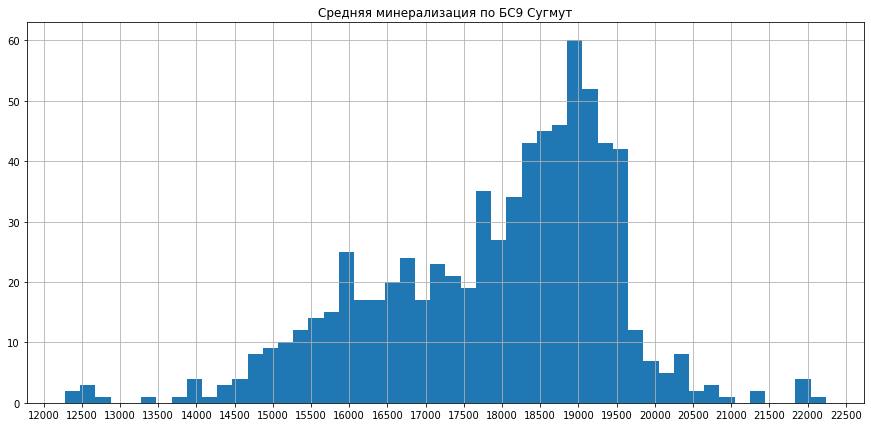

In [24]:
f, ax = plt.subplots(figsize = (15,7))
ax.set_title('Средняя минерализация по БС9 Сугмут')
ax.hist(chem_avg_clean.min_avg, bins=50)
ax.xaxis.set_major_locator(MultipleLocator(500))
ax.grid()
f.savefig('sug_min_histo.pdf')

In [25]:
chem_avg_clean_low = chem_avg_clean.query('min_avg <= 15500')
chem_avg_clean_mid = chem_avg_clean.query('15500 < min_avg <= 17500')
chem_avg_clean_high = chem_avg_clean.query('17500 < min_avg')

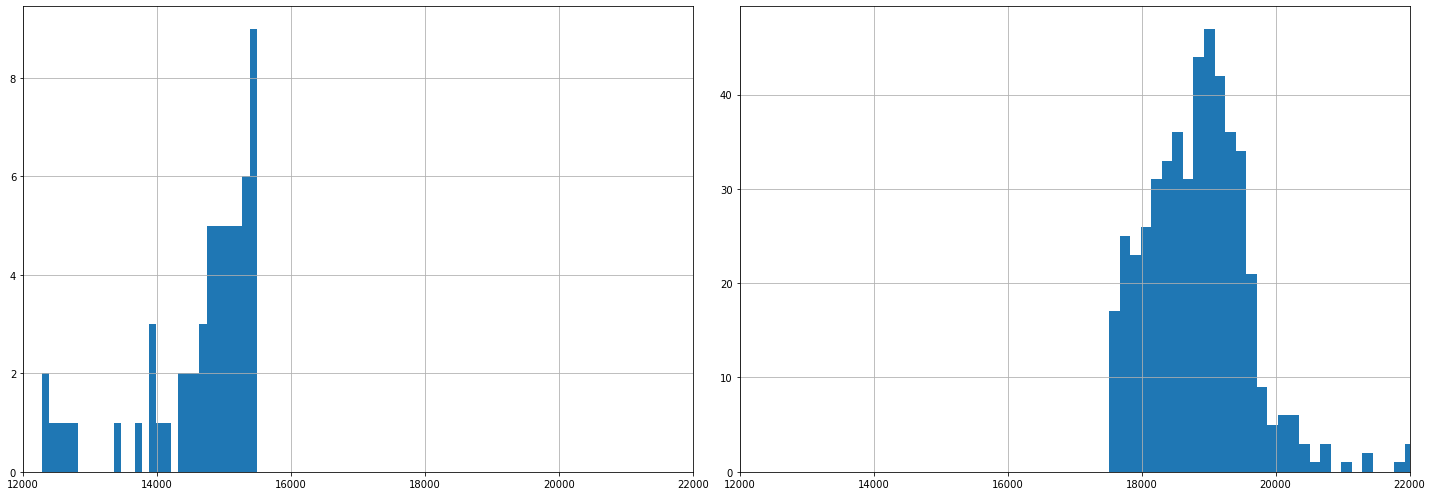

In [26]:
f, ax = plt.subplots(1,2, figsize = (20,7))
ax[0].hist(chem_avg_clean_low.min_avg, bins=30)
ax[1].hist(chem_avg_clean_high.min_avg, bins=30)
ax[0].set_xlim(12000, 22000)
ax[1].set_xlim(12000, 22000)
ax[0].grid()
ax[1].grid()
f.tight_layout()

PermissionError: [Errno 13] Permission denied: 'sug_min_plot.pdf'

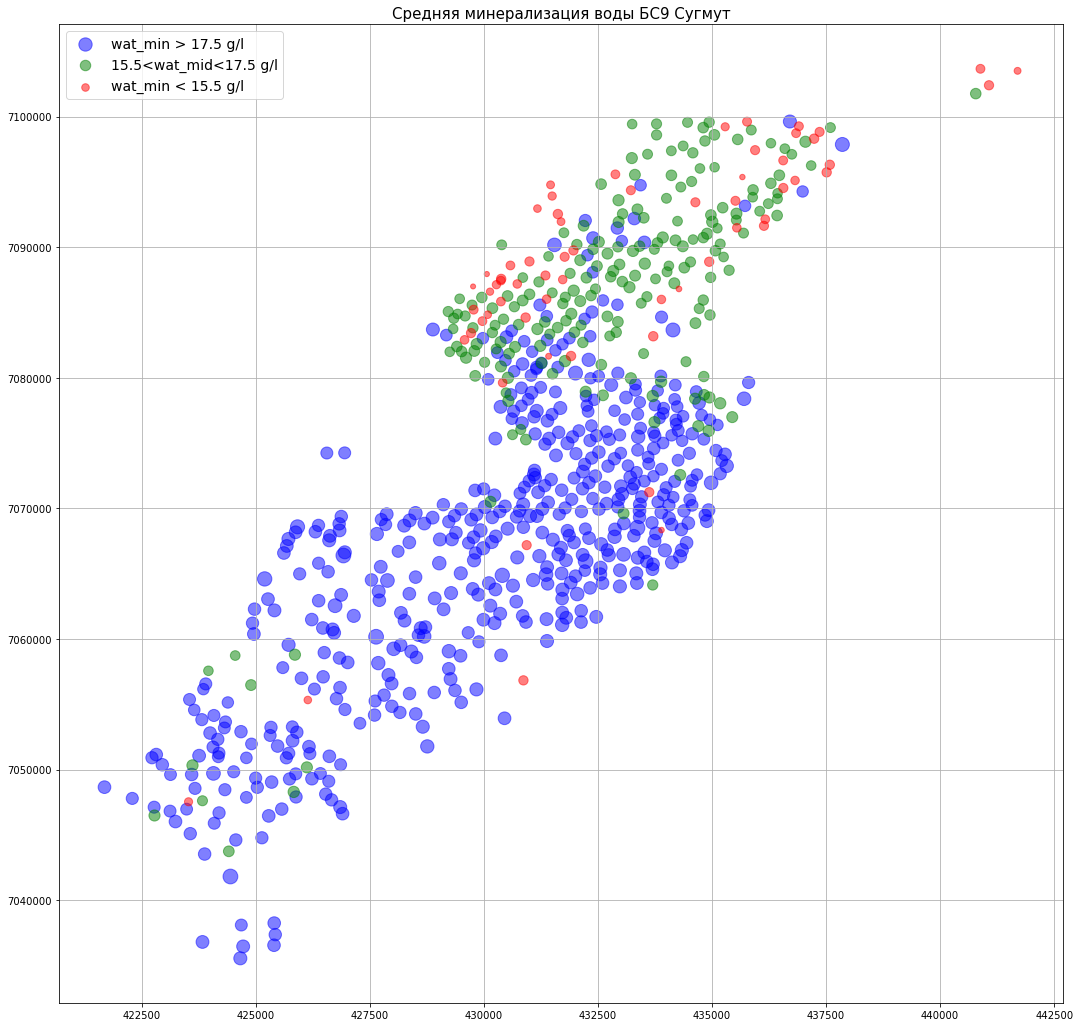

In [27]:
f, ax = plt.subplots(figsize = (18,18))
ax.set_title('Средняя минерализация воды БС9 Сугмут', fontsize=15)
x_low = chem_avg_clean_low.x_coord
y_low = chem_avg_clean_low.y_coord
x_mid = chem_avg_clean_mid.x_coord
y_mid = chem_avg_clean_mid.y_coord
x_high = chem_avg_clean_high.x_coord
y_high = chem_avg_clean_high.y_coord
area_high = (chem_avg_clean_high.min_avg-11000)*0.02
area_mid = (chem_avg_clean_mid.min_avg-11000)*0.02
area_low = (chem_avg_clean_low.min_avg-11000)*0.02
ax.scatter(x_high,y_high, c = 'blue', s = area_high, alpha = 0.5, label = 'wat_min > 17.5 g/l')
ax.scatter(x_mid,y_mid, c = 'green', s = area_mid, alpha = 0.5, label = '15.5<wat_mid<17.5 g/l')
ax.scatter(x_low,y_low, c = 'red', s = area_low, alpha = 0.5, label = 'wat_min < 15.5 g/l')
sf = ScalarFormatter()
sf.set_powerlimits((-7, 7))
ax.yaxis.set_major_formatter(sf)
ax.legend(fontsize=14)
ax.grid()
f.savefig('sug_min_plot.pdf')